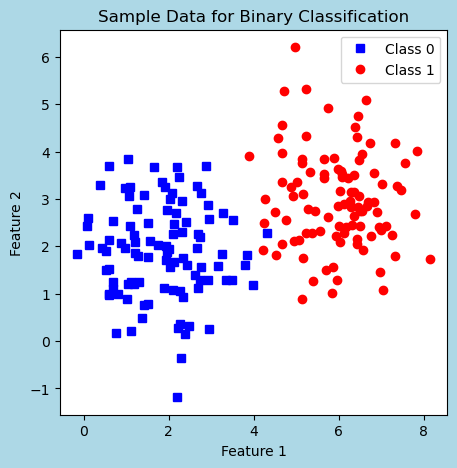

In [81]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Parameters
data_points_per_class = 100
data_noise = 1

class_A_center = [2, 2]  
class_B_center = [6, 3]  

# Generate data
class_A_data = [class_A_center[0] + np.random.randn(data_points_per_class) * data_noise, class_A_center[1] + np.random.randn(data_points_per_class) * data_noise]
class_B_data = [class_B_center[0] + np.random.randn(data_points_per_class) * data_noise, class_B_center[1] + np.random.randn(data_points_per_class) * data_noise]

# True labels
labels_np = np.vstack((np.zeros((data_points_per_class, 1)), np.ones((data_points_per_class, 1))))

# Concatenate into a matrix
data_np = np.hstack((class_A_data, class_B_data)).T

# Convert to a PyTorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# Set a bright blue background color
plt.figure(figsize=(5, 5), facecolor='lightblue')
plt.plot(data[labels[:, 0] == 0][:, 0], data[labels[:, 0] == 0][:, 1], 'bs', label='Class 0')
plt.plot(data[labels[:, 0] == 1][:, 0], data[labels[:, 0] == 1][:, 1], 'ro', label='Class 1')
plt.title('Sample Data for Binary Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [90]:
import torch.nn as nn

def create_binary_classification_model(learning_rate):
    # Model architecture
    model = nn.Sequential(
        nn.Linear(2, 1),  
        nn.ReLU(), 
        nn.Linear(1, 1)
    )

    # Loss function
    loss_function = nn.BCEWithLogitsLoss()

    # Optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    return model, loss_function, optimizer


In [91]:
def train_model(model, num_epochs=1000):
    # Initialize losses
    training_losses = torch.zeros(num_epochs)

    # Loop over epochs
    for epoch in range(num_epochs):
        # Forward pass
        predictions = model(data)

        # Compute loss
        training_loss = loss_function(predictions, labels)
        training_losses[epoch] = training_loss

        # Backpropagation
        optimizer.zero_grad()
        training_loss.backward()
        optimizer.step()

    # Final forward pass
    final_predictions = model(data)

    # Compute accuracy
    accuracy = 100 * torch.mean(((final_predictions > 0) == labels).float())

    return training_losses, final_predictions, accuracy


Final accuracy: 94.50%


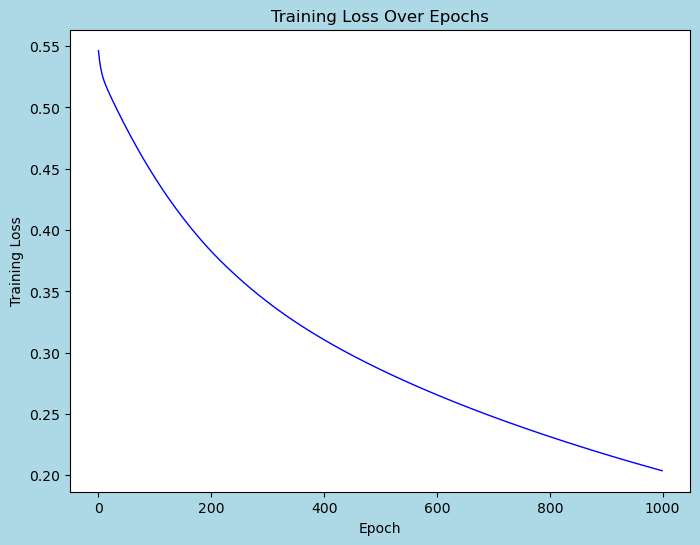

In [80]:
# Create the binary classification model
binary_classification_model, loss_function, optimizer = create_binary_classification_model(0.01)

# Train the model
training_losses, final_predictions, accuracy = train_model(binary_classification_model, 1000)

# Report accuracy
print('Final accuracy: %.2f%%' % accuracy)

# Set a bright blue background color
plt.figure(figsize=(8, 6), facecolor='lightblue')
plt.plot(training_losses.detach(), 'b-', linewidth=1)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Over Epochs')
plt.show()


In [59]:
# Learning rates to test
learning_rates_to_test = np.linspace(0.001, 0.1, 40)
# learning_rates_to_test = np.logspace(-3, 1, num=70, base=10.0)

num_epochs=1000

# Initialize results
accuracies_by_lr = []
all_losses = np.zeros((len(learning_rates_to_test), num_epochs))

# Loop through learning rates
for i, lr in enumerate(learning_rates_to_test):
    # Create and train the model
    model, loss_function, optimizer = create_binary_classification_model(lr)
    training_losses, predictions, accuracy = train_model(model, num_epochs)

    # Store the results
    accuracies_by_lr.append(accuracy)
    all_losses[i, :] = training_losses.detach()


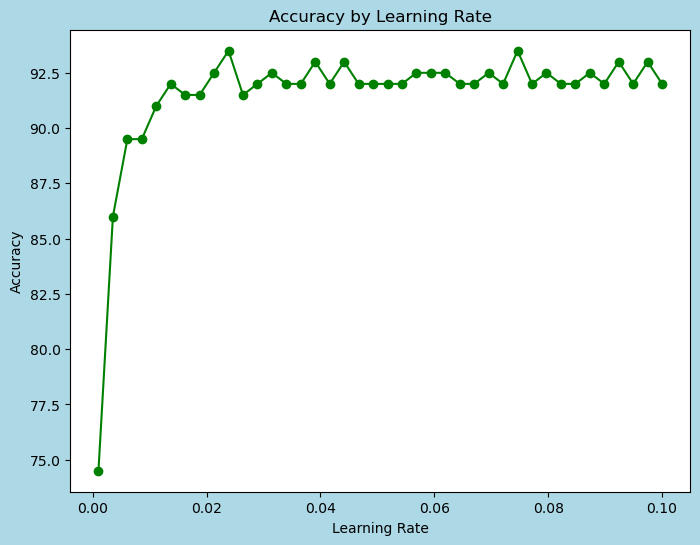

In [62]:
# Set a bright blue background color
plt.figure(figsize=(8, 6), facecolor='lightblue')
plt.plot(learning_rates_to_test, accuracies_by_lr, 'go-')
plt.xlabel('Learning Rate')
# plt.xscale('log')
plt.ylabel('Accuracy')
plt.title('Accuracy by Learning Rate')
plt.show()

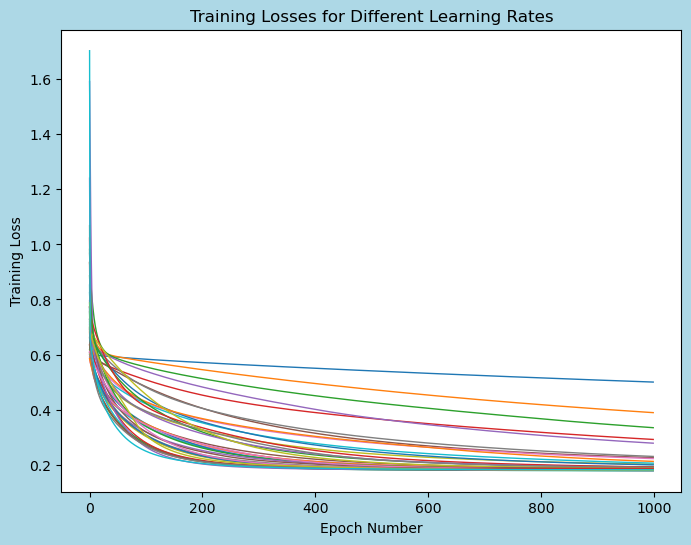

In [61]:
# Set a bright blue background color
plt.figure(figsize=(8, 6), facecolor='lightblue')
plt.plot(all_losses.T, linewidth=1)
plt.title('Training Losses for Different Learning Rates')
plt.xlabel('Epoch Number')
plt.ylabel('Training Loss')
plt.show()


In [38]:
# Calculate the proportion of runs with at least 70% accuracy
proportion_above_70_percent = sum(np.array(accuracies_by_lr) > 70) / len(accuracies_by_lr)
print('Proportion of runs with at least 70% accuracy: {:.2f}'.format(proportion_above_70_percent))


Proportion of runs with at least 70% accuracy: 0.55


In [107]:
from concurrent.futures import ProcessPoolExecutor, as_completed

# Number of experiments to iterate through
num_experiments = 10 #50

# Fewer epochs for faster computation
num_epochs = 200 #500

# Learning rates to test
# learning_rates_to_test = np.linspace(0.001, 0.1, 40)
learning_rates_to_test = np.logspace(-3, 1, num=70, base=10.0)

# Matrix to store all results
accuracy_by_lr_meta = np.zeros((num_experiments, len(learning_rates_to_test)))

# Original serial code
# Perform the experiments
for experiment_idx in range(num_experiments):
    for i, lr in enumerate(learning_rates_to_test):
        # Create and train the model
        model, loss_function, optimizer = create_binary_classification_model(lr)
        training_losses, predictions, accuracy = train_model(model, num_epochs)

        # Store the results
        accuracy_by_lr_meta[experiment_idx, i] = accuracy

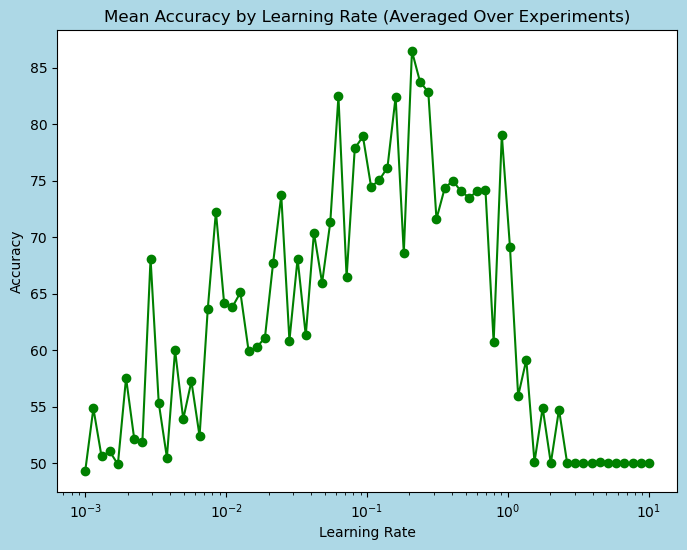

In [109]:
# Set a bright blue background color
plt.figure(figsize=(8, 6), facecolor='lightblue')
plt.plot(learning_rates_to_test, np.mean(accuracy_by_lr_meta, axis=0), 'go-')
plt.xlabel('Learning Rate')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.title('Mean Accuracy by Learning Rate (Averaged Over Experiments)')
plt.show()